In [1]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
from arch.bootstrap import StationaryBootstrap

# add utils path
src_path = os.path.abspath('../../')
if src_path not in sys.path:
    sys.path.append(src_path)

# import custom functions
%load_ext autoreload
%autoreload 2

from src.backtesting import BacktestTrader
from src.trading_rules import EWMACRule
from src.utils import plot_distribution

# bootstrap plotting config
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
df = yf.download('SPY', start='2000-01-01', end='2001-12-31', multi_level_index=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
ewmac = EWMACRule(
    16,
    64
)

In [4]:
forecasts = ewmac.generate_forecasts(df)
plot_data = ewmac.get_plot_data()
raw_forecasts = ewmac.get_raw_forecasts()

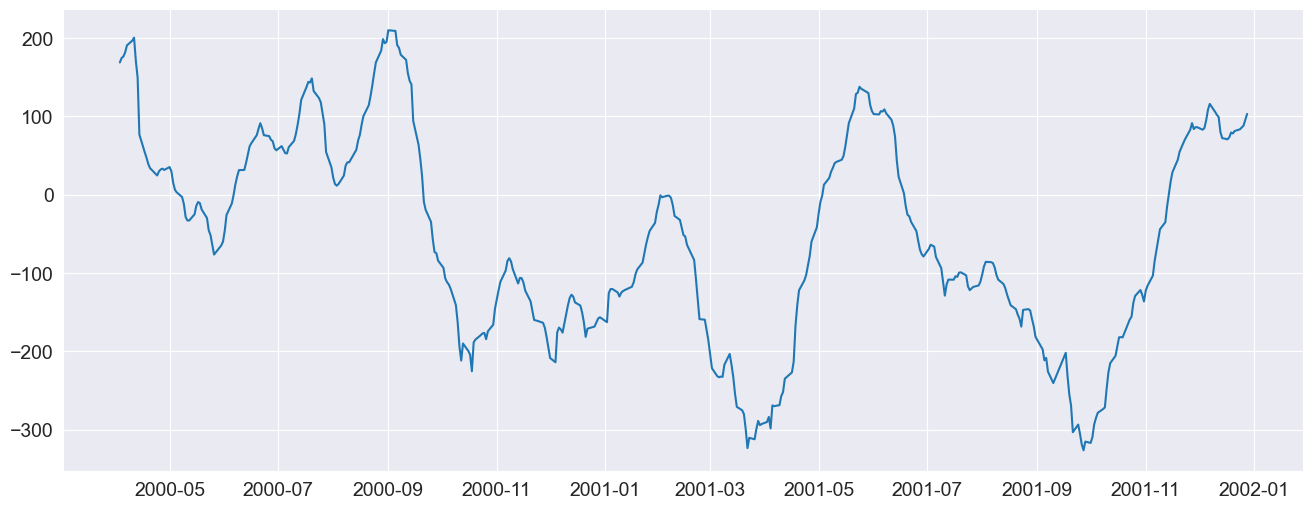

In [5]:
plt.plot(raw_forecasts)
plt.show()

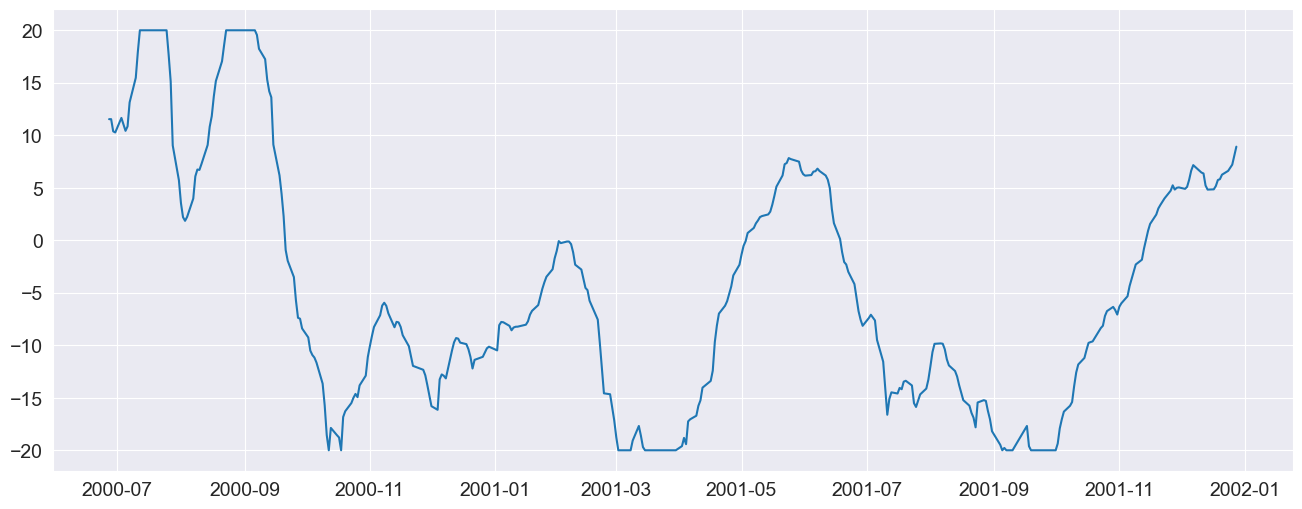

In [6]:
plt.plot(forecasts)
plt.show()

In [7]:
ols_ewmac = EWMACRule(
    16,
    64,
    ols_window=100
)

ols_forecasts = ols_ewmac.generate_forecasts(df)
ols_plot_data = ols_ewmac.get_plot_data()
ols_raw_forecasts = ols_ewmac.get_raw_forecasts()

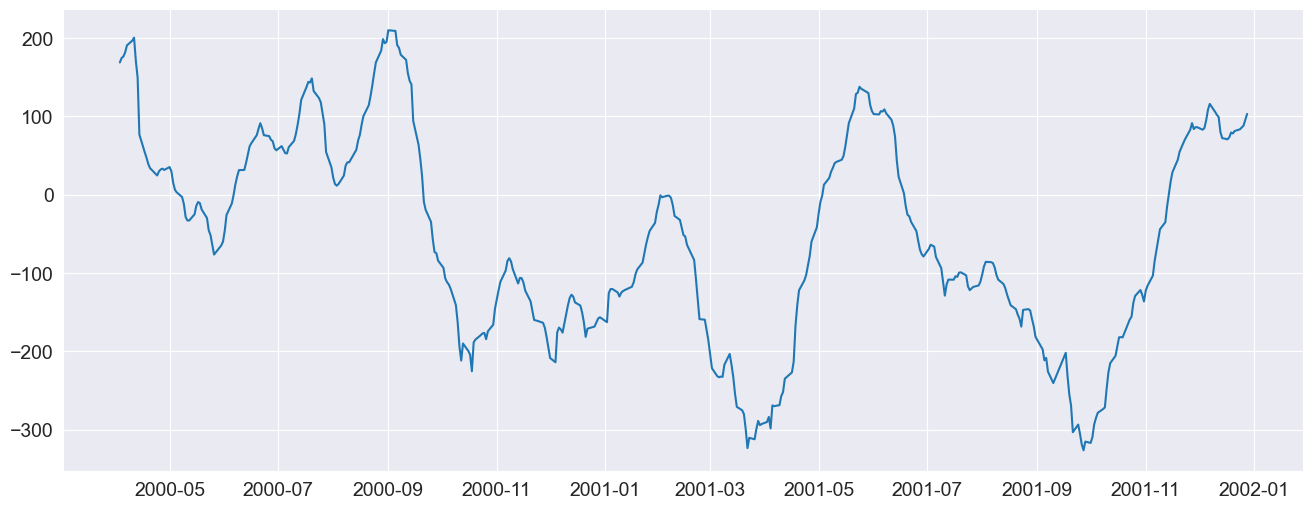

In [8]:
plt.plot(ols_raw_forecasts)
plt.show()

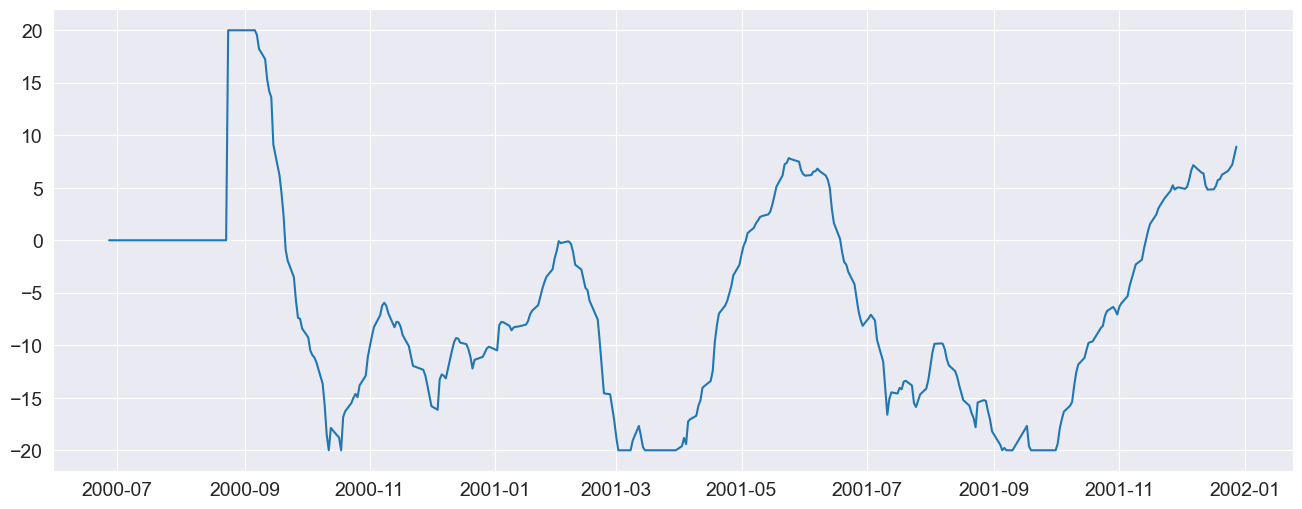

In [9]:
plt.plot(ols_forecasts)
plt.show()

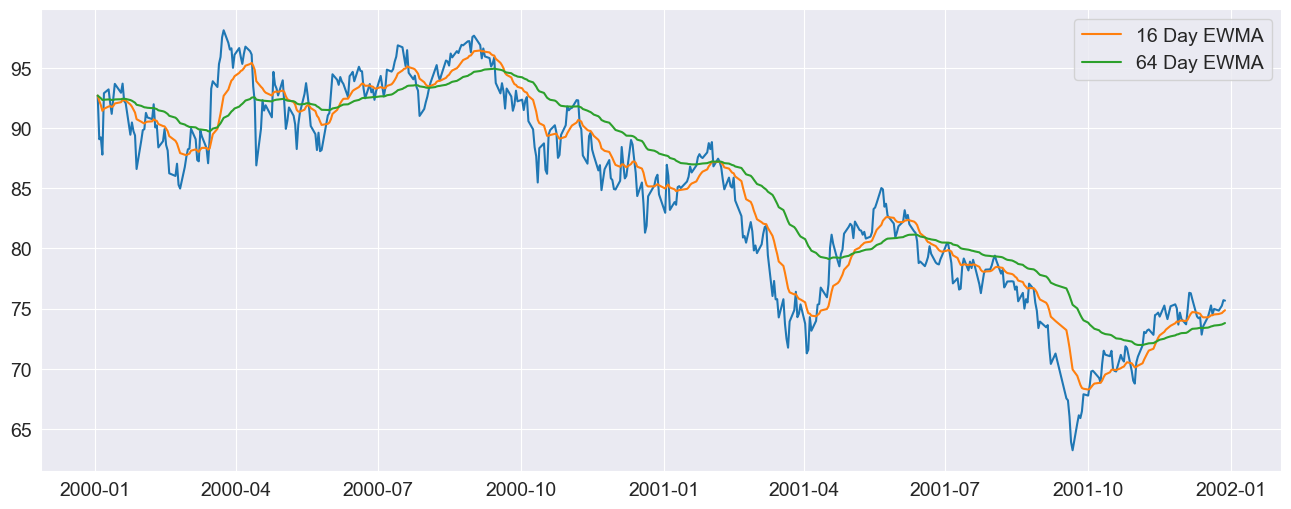

In [10]:
plt.plot(df['Close'])

for key, val in ols_plot_data.items():
    plt.plot(val, label=key)
    
plt.legend()
plt.show()


In [52]:
ewmac = EWMACRule(
    16,
    64,
    ols_window=60
)

ewmac_backtest = BacktestTrader(
    ewmac,
    df,
    volatility_target=0.2
)

ewmac_backtest.run_backtest(log=True)

None: Backtesting... 
Starting Value: $10000.0
2000-01-03 00:00:00:position {'SPY': 0}
2000-01-04 00:00:00:position {'SPY': 0}
2000-01-05 00:00:00:position {'SPY': 0}
2000-01-06 00:00:00:position {'SPY': 0}
2000-01-07 00:00:00:position {'SPY': 0}
2000-01-10 00:00:00:position {'SPY': 0}
2000-01-11 00:00:00:position {'SPY': 0}
2000-01-12 00:00:00:position {'SPY': 0}
2000-01-13 00:00:00:position {'SPY': 0}
2000-01-14 00:00:00:position {'SPY': 0}
2000-01-18 00:00:00:position {'SPY': 0}
2000-01-19 00:00:00:position {'SPY': 0}
2000-01-20 00:00:00:position {'SPY': 0}
2000-01-21 00:00:00:position {'SPY': 0}
2000-01-24 00:00:00:position {'SPY': 0}
2000-01-25 00:00:00:position {'SPY': 0}
2000-01-26 00:00:00:position {'SPY': 0}
2000-01-27 00:00:00:position {'SPY': 0}
2000-01-28 00:00:00:position {'SPY': 0}
2000-01-31 00:00:00:position {'SPY': 0}
2000-02-01 00:00:00:position {'SPY': 0}
2000-02-02 00:00:00:position {'SPY': 0}
2000-02-03 00:00:00:position {'SPY': 0}
2000-02-04 00:00:00:position {'SP

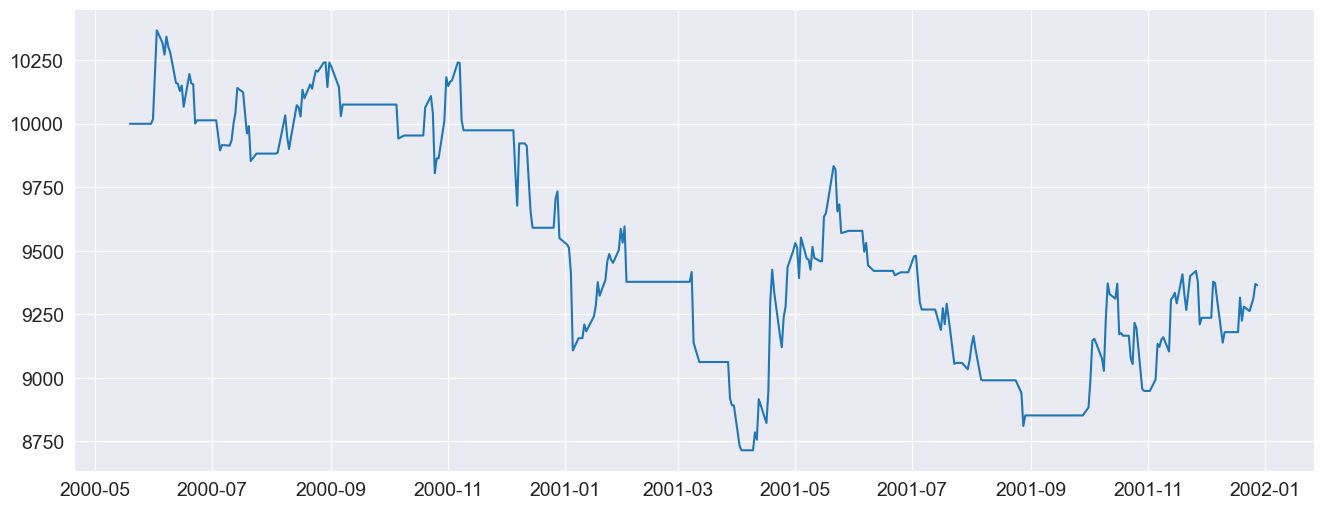

In [51]:
analysis = ewmac_backtest.get_analysis()

plt.plot(analysis['value_history'])

In [13]:
forecasts = ewmac.get_forecasts()
raw_forecasts = ewmac.get_raw_forecasts()
vol_history = ewmac.get_vol_history()

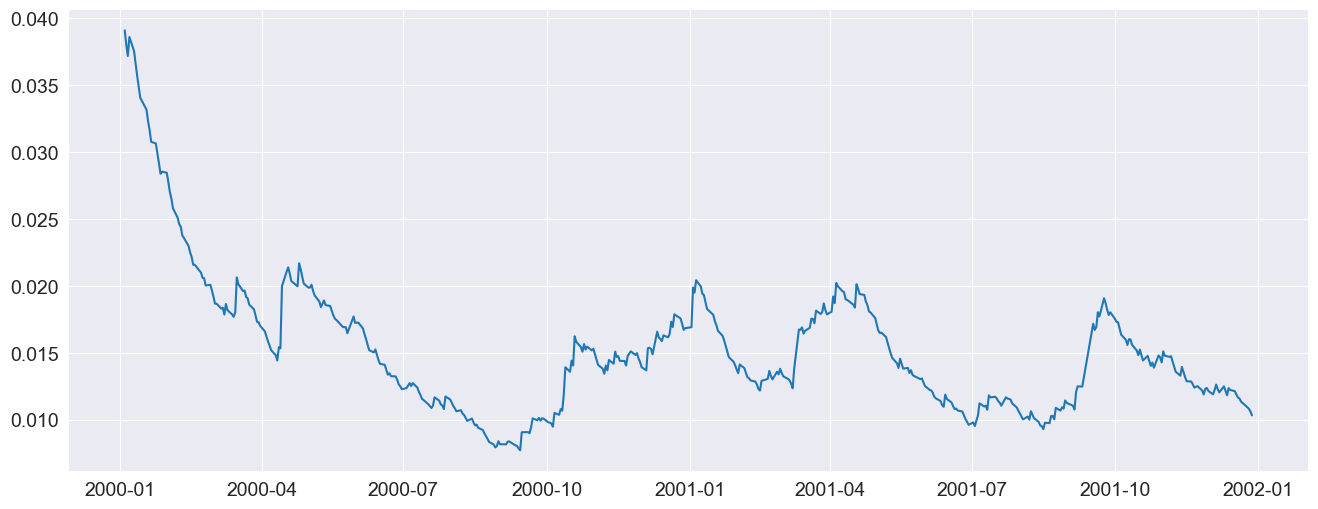

In [ ]:
plt.plot(np.sqrt(vol_history))

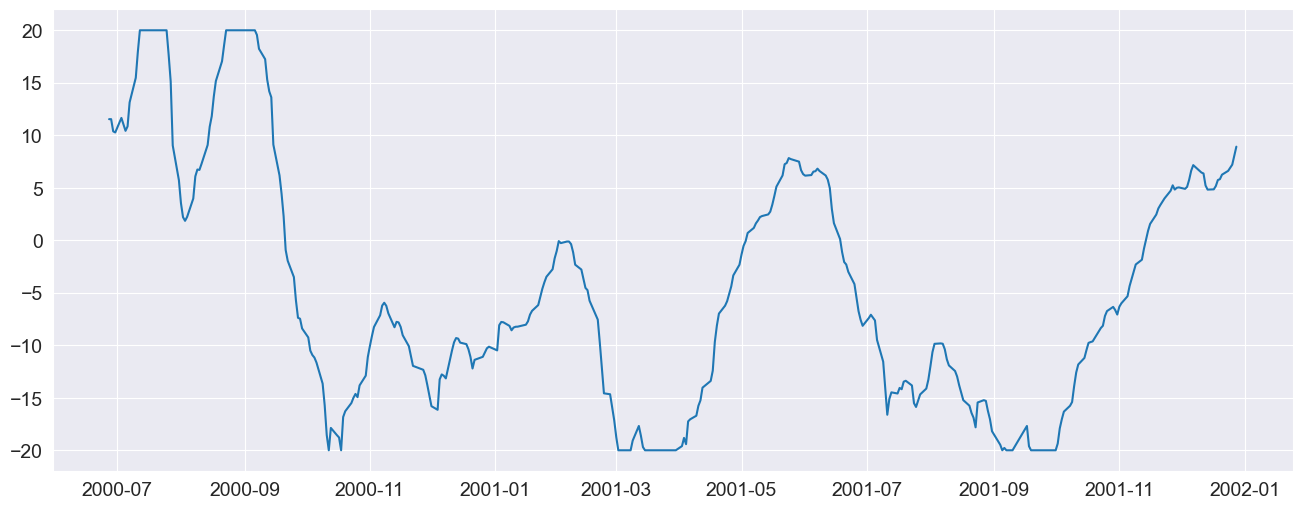

In [15]:
plt.plot(forecasts)

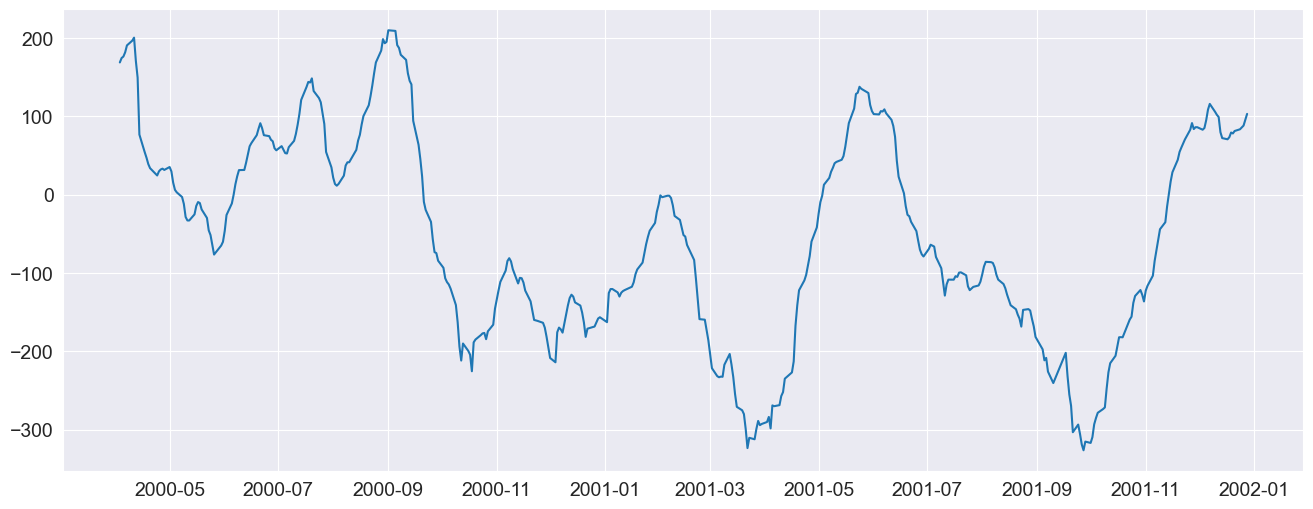

In [16]:
plt.plot(raw_forecasts)
